In [87]:
import pandas as pd
import re
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

In [2]:
#conda install pyarrow=8.0.0

In [3]:
#pip show pyarrow

In [5]:
#df_news_final_project = pd.read_parquet('news_final_project.parquet', engine='pyarrow')

In [145]:
df_news_final_project = pd.read_parquet('https://storage.googleapis.com/msca-bdp-data-open/news_final_project/news_final_project.parquet', engine='pyarrow')

In [149]:
df_news_final_project.shape

(200332, 5)

In [3]:
df_news_final_project.head()

,url,date,language,title,text
0,http://en.people.cn/n3/2021/0318/c90000-9830122.html,2021-03-18,en,Artificial intelligence improves parking efficiency in Chinese cities - People's Daily Online,"\n\nArtificial intelligence improves parking efficiency in Chinese cities - People's Daily Online\n\nHome\nChina Politics\nForeign Affairs\nOpinions\nVideo: We Are China\nBusiness\nMilitary\nWorld\nSociety\nCulture\nTravel\nScience\nSports\nPhoto\n\nLanguages\n\nChinese\nJapanese\nFrench\nSpanish\nRussian\nArabic\nKorean\nGerman\nPortuguese\nThursday, March 18, 2021\nHome>>\n\t\t\nArtificial intelligence improves parking efficiency in Chinese cities\nBy Liu Shiyao (People's Daily) 09:16, Mar..."
1,http://newsparliament.com/2020/02/27/children-with-autism-saw-their-learning-and-social-skills-boosted-after-playing-with-this-ai-robot/,2020-02-27,en,Children With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament,"\nChildren With Autism Saw Their Learning and Social Skills Boosted After Playing With This AI Robot – News Parliament\n \n\nSkip to content\n\t\t\tThursday, February 27, 2020\t\t\n\nLatest:\n\n\nMansplaining in conferences: How can we get him to forestall?\n\n\nDrax power station to cease burning coal in March 2021\n\n\nCoronavirus Could Explode in the U.S. Overnight Like it Did in Italy\n\n\nCoronavirus: Dettol sales surge as markets fall again\n\n\nLevi Strauss marks the next phase in cor..."
2,http://www.dataweek.co.za/12835r,2021-03-26,en,"Forget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek","\n\nForget ML, AI and Industry 4.0 – obsolescence should be your focus - 26 February 2021 - Test & Rework Solutions - Dataweek\nHome\nAbout us\nBack issues / E-book / PDF\nEMP Handbook\nSubscribe\nAdvertise\n\nCategories\n\n▸ Editor's Choice\n▸ Multimedia, Videos\n▸ Analogue, Mixed Signal, LSI\n▸ Circuit & System Protection\n▸ Computer/Embedded Technology\n▸ Design Automation\n▸ DSP, Micros & Memory\n▸ Electronics Technology\n▸ Enclosures, Racks, Cabinets & Panel Products\n▸ Events\n▸ Interc..."
3,http://www.homeoffice.consumerelectronicsnet.com/strategy-analytics-71-of-smartphones-sold-globally-in-2021-will-be-ai-powered/,2021-03-10,en,Strategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered – Consumer Electronics Net,\n\nStrategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered – Consumer Electronics Net\n \nSkip to content\n\nConsumer Electronics Net\n\nPrimary Menu\n\nConsumer Electronics Net\n\nSearch for:\n \nHomeNewsStrategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered \n \n News\n \n \nStrategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered\n 7 hours...
4,http://www.itbusinessnet.com/2020/10/olympus-to-support-endoscopic-ai-diagnosis-education-for-doctors-in-india-and-to-launch-ai-diagnostic-support-application/?utm_source=rss&utm_medium=rss&utm_campaign=olympus-to-support-endoscopic-ai-diagnosis-education-for-doctors-in-india-and-to-launch-ai-diagnostic-support-application,2020-10-20,en,Olympus to Support Endoscopic AI Diagnosis Education for Doctors in India and to Launch AI Diagnostic Support Application | | IT Business Net,\n\nOlympus to Support Endoscopic AI Diagnosis Education for Doctors in India and to Launch AI Diagnostic Support Application | | IT Business Net\n \nSkip to content\n\nIT Business Net\n\nNews for IT Professionals\nPrimary Menu\n\nIT Business Net\nAbout IT Business Net\n\nSearch for:\n \nHome2020OctoberOlympus to Support Endoscopic AI Diagnosis Education for Doctors in India and to Launch AI Diagnostic Support Application \n \n News\n ...


In [4]:
df_news_final_project.shape

(200332, 5)

Filter out related articles by using keywords

In [8]:

# keywords = ['machine learning','artificial intelligence', 'data science','Machine Learning', 'Artificial Intelligence', 'Data Science']

# # Create a regular expression pattern from the keywords
# pattern = re.compile('|'.join(keywords))

# # Filter the dataframe based on the pattern
# filtered_df = df_news_final_project[df_news_final_project['text'].str.contains(pattern)]

In [9]:
#filtered_df.shape

(146106, 5)

In [5]:
filtered_df = df_news_final_project

In [6]:
#remove tabs 
filtered_df['text_no_tr'] = filtered_df['text'].apply(lambda x:re.sub(r'(?:\t|\r)','',str(x)))

In [7]:
#remove url 
filtered_df['text_no_url'] = filtered_df['text_no_tr'].apply(lambda x:re.sub(r'(?:\@|http?\://|https?\://|www)\S+','',str(x)))

In [8]:
#remove \xa0 \xad \ \'
filtered_df['text_no_special'] = filtered_df['text_no_url'].apply(lambda x:re.sub(r'(?:\xa0|\xad|\'|\\)','',str(x)))

In [9]:
def change_title(title):
    if title[0] == '-' or title[0] == '|':
        return title[1:]
    else:
        return title

In [10]:
filtered_df['clean_title'] = filtered_df['title'].apply(change_title)

In [11]:
filtered_df['clean_title'] = filtered_df['clean_title'].str.strip()

In [12]:
filtered_df['clean_title'] = filtered_df['clean_title'].str.replace('-','–')

In [13]:
filtered_df['clean_title'] = filtered_df['clean_title'].apply(lambda x: x.split('–')[0])
filtered_df['clean_title'] = filtered_df['clean_title'].apply(lambda x: x.split('|')[0])
filtered_df['clean_title'] = filtered_df['clean_title'].str.strip()

In [14]:
def adjust_title(title):
    if title[-1] == '?':
        return title[:-1]
    else:
        return title

In [15]:
filtered_df['clean_title'] = filtered_df['clean_title'].apply(adjust_title)

In [35]:
#filtered_df['clean_text'] = filtered_df['text_no_special'].apply(lambda x:re.sub(r'[^a-zA-Z0-9 . , : - _]','',str(x)))

In [16]:
def remove_front_empty(text):
    index = len(text) - len(text.lstrip())
# Remove the empty string before the text
    result = text[index:]
    return result

In [17]:
filtered_df['clean_text'] = filtered_df['text_no_special'].apply(remove_front_empty)

In [18]:
#filtered_df['clean_text'] = filtered_df['clean_text'].apply(remove_front_empty)

In [18]:
def split_text_by_title(text, title):
    if title in text:
        return text.split(title)
    else:
        return [text]

In [19]:
filtered_df.isnull().sum()

url                0
date               0
language           0
title              0
text               0
text_no_tr         0
text_no_url        0
text_no_special    0
clean_title        0
clean_text         0
dtype: int64

In [20]:
filtered_df['text_list'] = filtered_df.apply(lambda row: split_text_by_title(row['clean_text'], row['clean_title']), axis=1)

In [21]:
filtered_df['main_text'] = filtered_df['text_list'].apply(lambda x: max(x,  key=len))

In [23]:
#filtered_df[filtered_df['main_text'].str.contains('How creepy')]['text'].head(10)

In [22]:
def extract_exact(text):
    # Filter elements with length larger than 50
    text_list = text.split('\n')
    filtered_list = list(filter(lambda x: len(x) >= 50,text_list))

    # Join the filtered elements back together
    joined_string = " ".join(filtered_list)

    return joined_string

In [23]:
filtered_df['inter_text'] = filtered_df['main_text'].apply(extract_exact)

In [24]:
ending_words = ['READ MORE：','View original content','For more information','View More','ExploreMore','For More Information',
                'Join Us','More information is available','Media Contact','Follow Us','The views, opinions and statements in the press release',
                'Next Article','More Stories','Related Content','Read More','Related Stories','Share This To World','Read more','Share this article',
                'Related topics','Related posts','Related News','Media Conact','This release was drafted by','About Us:','Trending:',
                'Previous post:','Most Popular','Related:','RELATED ARTICLES','Article Topic Follows','Subscriber Exclusives','Also read']


In [25]:
def extract_text(text):
    for ending_word in ending_words:
        # Find the index of the ending word in the article
        idx = text.find(ending_word)
        # If the ending word is found, delete the content after it
        if idx == 1:
            text = text[len(ending_word)+1:]
            idx = text.find(ending_word)
        if idx != -1:
            return text[:idx-1]
    return text


In [26]:
filtered_df['formal_text'] = filtered_df['inter_text'].apply(extract_text)

In [27]:
filtered_df[filtered_df['formal_text']==''].shape

(2293, 14)

In [28]:
filtered = filtered_df[filtered_df['formal_text']!='']

In [29]:
filtered['formal_text'] = filtered['clean_title'] + ' ' + filtered['formal_text']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
#df_news = filtered_df[filtered_df['formal_text']!= '']

In [30]:
filtered.shape

(198039, 14)

In [31]:
keywords = ['machine learning','artificial intelligence', 'data science','Machine Learning', 'Artificial Intelligence', 'Data Science']

# Create a regular expression pattern from the keywords
pattern = re.compile('|'.join(keywords))

# Filter the dataframe based on the pattern
df_news = filtered_df[filtered_df['formal_text'].str.contains(pattern)]

In [32]:
df_news.shape

(126230, 14)

In [33]:
df_news.to_parquet('clean_data.parquet')

In [3]:
#df_news.to_parquet('gs://msca-nlp-bucket/data/filtered_data.parquet')

sample 1500 articles to run

In [2]:
df_news = pd.read_parquet('clean_data.parquet')

In [3]:
df_s = pd.read_parquet('sentiment_data.parquet')

In [4]:
sentiment = df_s.iloc[:, -1]

In [5]:
df_all = pd.concat([df_news, sentiment], axis=1)

In [7]:
df_all.to_parquet('data_s.parquet')

In [ ]:
df_all = pd.read_parquet('data_s.parquet')

In [ ]:
df_all.to_parquet('gs://msca-nlp-bucket/data/data_s.parquet')

In [ ]:
pos_app = df_all[df

In [43]:
#sample_df = df_news.sample(1000)

In [81]:
#little_sample = df_news.sample(1000)

In [43]:
#little_sample.to_csv('little_sample.csv')

In [43]:
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

# analyzer = SentimentIntensityAnalyzer()

# def vader_sentiment_result(sent):
#     scores = analyzer.polarity_scores(sent)
    
#     if scores["neg"] > scores["pos"]:
#         return 0

#     return 1

# little_sample["vader_result"] = little_sample["formal_text"].apply(lambda x: vader_sentiment_result(x))

In [39]:
#pip install transformers

In [45]:
#pip install torch

In [3]:
import torch

# Check if PyTorch is installed and print the version
print(torch.__version__)

1.8.1+cu111


In [4]:
#pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/cu111/torch_stable.html

In [4]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

model = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

In [5]:
def label_sentiment(text):
    label_mapping = {0: "negative", 1: "neutral", 2: "positive"}
    encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
    outputs = model(**encoded_input)
    # Get the predicted label
    predicted_label = outputs.logits.argmax().item()

# Map the numerical label to sentiment label
    entiment_label = label_mapping[predicted_label]
    return entiment_label

'negative'

In [6]:
df_news['sentiment'] = df_news['formal_text'].apply(label_sentiment)

In [7]:
df_news['sentiment'].value_counts()

positive    62234
neutral     58434
negative     5619
Name: sentiment, dtype: int64

In [19]:
df_news[['title','sentiment']].head(20)

,title,sentiment
0,Artificial intelligence improves parking efficiency in Chinese cities - People's Daily Online,positive
3,Strategy Analytics: 71% of Smartphones Sold Globally in 2021 will be AI Powered – Consumer Electronics Net,positive
7,MulticoreWare Inc. Becomes CEVA’s Trusted Partner for Imaging & Computer Vision – Consumer Electronics Net,positive
9,"Artificial Intelligence In Behavioral And Mental Health Care Market to Witness Astonishing Growth by 2026 Focusing on Leading Players – AdvancedMD , Cerner , Core Solutions , Credible Behavioral Health – 3w Market News Reports",positive
10,"AI/ Machine Learning Market 2020 Expected to Reach $XX Million by 2024 – IBM, BAIDU, SOUNDHOUND, ZEBRA MEDICAL VISION, PRISMA, IRIS AI – 3w Market News Reports",positive
11,"According to Latest Report on Machine Learning Courses Market to Grow with an Impressive CAGR: Top Key Players – EdX, Ivy Professional School, NobleProg, etc. – 3rd Watch News",neutral
13,Apple bought more AI companies than anyone else between 2016 and 2020 - 9to5Mac,positive
14,Video Trump deepfakes on social media prompt warnings of AI risks - ABC News,neutral
15,"EU imposes sweeping regulations on facial recognition, Artificial Intelligence Video - ABC News",neutral
16,Calling All Startups in the AI Space - Africa.com,positive


In [25]:
df_news.to_parquet('gs://msca-nlp-bucket/data/sentiment_data.parquet')

In [26]:
#df_news.to_parquet('sentiment_data.parquet')

In [23]:
positive_app = df_news[df_news['sentiment']=='positive']

In [ ]:
texts_pos = positive_app['formal_text'].tolist()

In [24]:
negative_app = df_news[df_news['sentiment']=='negative']

In [14]:
df_news[['formal_text','sentiment']].head(20)

,formal_text,sentiment
0,"By LiuShiyao (Peoples Daily) 09:16, March 18, 2021 Photo taken on July 1, 2019, shows a sign for electronic toll collection (ETC) newly set up at a roadside parking space on Yangzhuang road, Shijingshan district, Beijing. Some urban areas of the city started to use ETC system for roadside parking spaces since July 1, 2019. (People’s Daily Online/Li Wenming) Thanks to the application of an artificial intelligence (AI)-empowered roadside electronic toll collection (ETC) system, China’s capital...",positive
3,"Artificial Intelligence Now Powers the Majority of Smartphones BOSTON–(BUSINESS WIRE)–Strategy Analytics in a newly published report, Smartphones: Global Artificial Intelligence Technologies Forecast to 2025, finds that on-device Artificial Intelligence (AI) is being rapidly implemented by smartphone vendors. AI is used in various functions inside smartphones such as intelligent power optimization, imaging, virtual assistants, and to enhance device performance. The report highlights the fact...",positive
7,"MulticoreWare Inc., joins the CEVAnet™ Partner Program – a comprehensive partner ecosystem to form a robust infrastructure around CEVA’s IP offerings. SAN JOSE, Calif.–(BUSINESS WIRE)–#ADAS–MulticoreWare Inc., joins CEVA, the leading licensor of sensor-hub Digital Signal Processors, AI engines and complementary framework & various software SDK’s, as their trusted partner to enable services on all computing platforms by implementing optimized kernels and frameworks in CEVA’s pipeline. Multic...",positive
9,"– AdvancedMD , Cerner , Core Solutions , Credible Behavioral Health June 13, 2020 [emailprotected] Artificial Intelligence In Behavioral And Mental Health Care Market Artificial Intelligence in Behavioral and Mental Health Care Market research report is the new statistical data source added by Healthcare Intelligence Markets. It uses several approaches for analyzing the data of target market such as primary and secondary research methodologies. It includes investigations based on historic...",positive
10,"– IBM, BAIDU, SOUNDHOUND, ZEBRA MEDICAL VISION, PRISMA, IRIS AI The Global AI/ Machine Learning Market report is aimed at highlighting a firsthand documentation of all the best practices in the AI/ Machine Learning industry that subsequently set the growth course active. These vital market oriented details are highly crucial to overcome cut throat competition and all the growth oriented practices typically embraced by frontline players in the AI/ Machine Learning market. Various factors and...",positive
11,"– EdX, Ivy Professional School, NobleProg, etc. Machine Learning Courses Market Report 2020 | Future Demands ’Machine Learning Courses Market’ Insights 2020, is a professional and in-depth study on the current state of the global Machine Learning Courses industry with a focus on the global market. An elaborate and comprehensive primary analysis report highlights numerous facets such as business enhancement strategies, development factors, financial gain, statistical growth or lo...",neutral
13,"Once in a while, Apple announces the acquisition of another company or startup, but now, new research from GlobalData shows that Apple is in fact investing heavily in artificial intelligence. The research reveals that Apple has acquired more AI companies than anyone else between 2016 and 2020. Apple comes ahead of companies like Accenture, Google, Microsoft, and Facebook when it comes to the acquisition of companies and startups that specialize in AI. In five years, Apple has bought 25 AI co...",positive
14,"ABC NewsVideoLiveShowsGuns in AmericaInterest Successfully AddedWell notify you here with news aboutTurn on desktop notifications for breaking stories about interest? OffOnLOG INStream onLatest:Severe weatherPence Jan. 6 probeUvalde student walkoutLong COVID sleep issuesCash App founder deadMich. abortion ban repealedTrump deepfakes on social media prompt warnings of AI risksEmerging artificial 

In [27]:
df_news['formal_text'][9]

' – AdvancedMD , Cerner , Core Solutions , Credible Behavioral Health  June 13, 2020 [emailprotected] Artificial Intelligence In Behavioral And Mental Health Care Market  Artificial Intelligence in Behavioral and Mental Health Care Market research report is the new statistical data source added by Healthcare Intelligence Markets. It uses several approaches for analyzing the data of target market such as primary and secondary research methodologies. It includes investigations based on historical records, current statistics, and futuristic developments. Artificial Intelligence In Behavioral And Mental Health Care Market is predicted to grow at a significant CAGR in the forecast period. Artificial Intelligence In Behavioral And Mental Health Care Market research reports growth rates and market value based on market dynamics, growth factors. Complete knowledge is based on the latest innovations in the industry, opportunities and trends. In addition to SWOT analysis by key suppliers, the re

In [56]:
little_sample[little_sample['sentiment']=='neutral']

,url,date,language,title,text,text_no_tr,text_no_url,text_no_special,clean_title,clean_text,text_list,main_text,inter_text,formal_text,sentiment
81789,https://missoulian.com/entertainment/arts-and-theatre/missoula-songwriters-experiment-in-ai-lyrics/article_87a63814-6d92-5331-89b7-933a5397d0fa.html,2023-01-12,en,Missoula songwriter's experiment in AI lyrics,\n\nMissoula songwriter's experiment in AI lyrics\n\nSkip to main contentSkip to main content\n\nRegister for more free articles.\nSign up for our newsletter to keep reading.\n\nStay up-to-date on...,\n\nMissoula songwriter's experiment in AI lyrics\n\nSkip to main contentSkip to main content\n\nRegister for more free articles.\nSign up for our newsletter to keep reading.\n\nStay up-to-date on...,\n\nMissoula songwriter's experiment in AI lyrics\n\nSkip to main contentSkip to main content\n\nRegister for more free articles.\nSign up for our newsletter to keep reading.\n\nStay up-to-date on...,\n\nMissoula songwriters experiment in AI lyrics\n\nSkip to main contentSkip to main content\n\nRegister for more free articles.\nSign up for our newsletter to keep reading.\n\nStay up-to-date on ...,Missoula songwriter's experiment in AI lyrics,Missoula songwriters experiment in AI lyrics\n\nSkip to main contentSkip to main content\n\nRegister for more free articles.\nSign up for our newsletter to keep reading.\n\nStay up-to-date on what...,[Missoula songwriters experiment in AI lyrics\n\nSkip to main contentSkip to main content\n\nRegister for more free articles.\nSign up for our newsletter to keep reading.\n\nStay up-to-date on wha...,Missoula songwriters experiment in AI lyrics\n\nSkip to main contentSkip to main content\n\nRegister for more free articles.\nSign up for our newsletter to keep reading.\n\nStay up-to-date on what...,Receive the latest in local entertainment news in your inbox weekly! Please subscribe to keep reading. You can cancel at any time. ...,Receive the latest in local entertainment news in your inbox weekly! Please subscribe to keep reading. You can cancel at any time. ...,neutral
117595,https://www.asiaone.com/digital/ibm-explores-ai-tools-spot-cut-bias-online-ad-targeting,2021-06-25,en,"IBM explores AI tools to spot, cut bias in online ad targeting, Digital News - AsiaOne","\n\n\nIBM explores AI tools to spot, cut bias in online ad targeting, Digital News - AsiaOne\n Skip to main content\n \n\nLatest\n\nNews\n\nSingapore\nMalaysia\nChina\nAsia\nWorld\n\nEnter...","\n\n\nIBM explores AI tools to spot, cut bias in online ad targeting, Digital News - AsiaOne\n Skip to main content\n \n\nLatest\n\nNews\n\nSingapore\nMalaysia\nChina\nAsia\nWorld\n\nEnter...","\n\n\nIBM explores AI tools to spot, cut bias in online ad targeting, Digital News - AsiaOne\n Skip to main content\n \n\nLatest\n\nNews\n\nSingapore\nMalaysia\nChina\nAsia\nWorld\n\nEnter...","\n\n\nIBM explores AI tools to spot, cut bias in online ad targeting, Digital News - AsiaOne\n Skip to main content\n \n\nLatest\n\nNews\n\nSingapore\nMalaysia\nChina\nAsia\nWorld\n\nEnter...","IBM explores AI tools to spot, cut bias in online ad targeting, Digital News","IBM explores AI tools to spot, cut bias in online ad targeting, Digital News - AsiaOne\n Skip to main content\n \n\nLatest\n\nNews\n\nSingapore\nMalaysia\nChina\nAsia\nWorld\n\nEntertainme...","[, - AsiaOne\n Skip to main content\n \n\nLatest\n\nNews\n\nSingapore\nMalaysia\nChina\nAsia\nWorld\n\nEntertainment\nLifestyle\nDigital Culture\n\nServices\n\nHoroscope\nCurrency Convert...",- AsiaOne\n Skip to main content\n \n\nLatest\n\nNews\n\nSingapore\nMalaysia\nChina\nAsia\nWorld\n\nEntertainment\nLifestyle\nDigital Culture\n\nServices\n\nHoroscope\nCurrency Converter\...,"IBM explores AI tools to spot, cut bias in online ad targeting A man stands near an IBM logo at the Mobile World Congress in Barcelona, Spain, on Feb 25, 2019. June 24 - IBM Corpis developing t...","IBM explores AI tools to spot, cut bias in online ad targeting A man stands near an I

In [19]:
df_news['url'][1137]

'https://gulfnews.com/technology/companies/google-to-weave-ai-technology-into-its-health-care-offerings-1.1678811766987'

In [20]:
df_news['formal_text'][1137]

'Announcements come more than a year after company shifted strategy for its health efforts Alphabet Inc.s Google unveiled plans to integrate artificial intelligence into health-related initiatives, including an update on the use of language-generating technology in medical exams and AI-assisted research, ways to help consumers find information faster via internet searches, and tools to help developers build health apps around the world.  "Health is a company-wide effort," Karen DeSalvo, Googles chief health officer, said in a blog post timed to an event at its Pier 57 Manhattan office on Tuesday. "The global reach of our products, services and platforms - coupled with our advanced AI technologies - provide a way to help billions of people live healthier lives."                  How Google’s early alert systems can warn you ahead of natural disasters like earthquakes and floods                 Meta to end news access for Canadians if Online News Act becomes law                 YouTube t

In [23]:
directory = 'https://storage.googleapis.com/msca-bdp-data-open/yelp/'
fileName = 'yelp_train_sentiment.json'

path = directory + fileName

In [24]:
%%time

yelp = pd.read_json(path, orient='records', lines=True)
yelp.shape

CPU times: user 1.59 s, sys: 1.06 s, total: 2.64 s
Wall time: 3.19 s


(255717, 3)

In [25]:
pd.set_option('display.max_colwidth', 200)

In [26]:
# define X and y
X = yelp['text']
y = yelp['label']

print(f"X Shape: {X.shape}")
print(f"y Shape: {y.shape}")

X Shape: (255717,)
y Shape: (255717,)


In [28]:
import sklearn
import pandas as pd

#import wordcloud
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import metrics
import numpy as np


In [29]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.25)

print(f"Training records, X_train: {X_train.shape} y_train: {y_train.shape}")
print(f"Testing records, X_test: {X_test.shape} y_test: {y_test.shape}")

Training records, X_train: (191787,) y_train: (191787,)
Testing records, X_test: (63930,) y_test: (63930,)


In [30]:
vect = CountVectorizer()

# vect = CountVectorizer(lowercase=False, stop_words='english',
#                                   max_df=0.8, min_df=0.2, max_features=10000, ngram_range=(1,3))

vect = CountVectorizer(lowercase=False, stop_words='english', ngram_range=(1,3))

In [31]:
logreg = LogisticRegression(max_iter=200)

In [32]:
%time logreg.fit(vect.fit_transform(X_train), y_train)

CPU times: user 21min 52s, sys: 15min 41s, total: 37min 34s
Wall time: 9min 49s


LogisticRegression(max_iter=200)

In [33]:
# make class predictions
y_pred = logreg.predict(vect.transform(X_test))

In [34]:
# calculate accuracy of class predictions
print(f"Test Accuracy: {metrics.accuracy_score(y_test, y_pred) * 100:.1f}%")

Test Accuracy: 97.3%


In [35]:
# calculate precision and recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     32217
           1       0.97      0.97      0.97     31713

    accuracy                           0.97     63930
   macro avg       0.97      0.97      0.97     63930
weighted avg       0.97      0.97      0.97     63930



In [36]:
little_sample = df_news.sample(10)

In [39]:
little_sample.head()

,url,date,language,title,text,text_no_tr,text_no_url,text_no_special,clean_title,clean_text,text_list,main_text,inter_text,formal_text
81789,https://missoulian.com/entertainment/arts-and-theatre/missoula-songwriters-experiment-in-ai-lyrics/article_87a63814-6d92-5331-89b7-933a5397d0fa.html,2023-01-12,en,Missoula songwriter's experiment in AI lyrics,\n\nMissoula songwriter's experiment in AI lyrics\n\nSkip to main contentSkip to main content\n\nRegister for more free articles.\nSign up for our newsletter to keep reading.\n\nStay up-to-date on...,\n\nMissoula songwriter's experiment in AI lyrics\n\nSkip to main contentSkip to main content\n\nRegister for more free articles.\nSign up for our newsletter to keep reading.\n\nStay up-to-date on...,\n\nMissoula songwriter's experiment in AI lyrics\n\nSkip to main contentSkip to main content\n\nRegister for more free articles.\nSign up for our newsletter to keep reading.\n\nStay up-to-date on...,\n\nMissoula songwriters experiment in AI lyrics\n\nSkip to main contentSkip to main content\n\nRegister for more free articles.\nSign up for our newsletter to keep reading.\n\nStay up-to-date on ...,Missoula songwriter's experiment in AI lyrics,Missoula songwriters experiment in AI lyrics\n\nSkip to main contentSkip to main content\n\nRegister for more free articles.\nSign up for our newsletter to keep reading.\n\nStay up-to-date on what...,[Missoula songwriters experiment in AI lyrics\n\nSkip to main contentSkip to main content\n\nRegister for more free articles.\nSign up for our newsletter to keep reading.\n\nStay up-to-date on wha...,Missoula songwriters experiment in AI lyrics\n\nSkip to main contentSkip to main content\n\nRegister for more free articles.\nSign up for our newsletter to keep reading.\n\nStay up-to-date on what...,Receive the latest in local entertainment news in your inbox weekly! Please subscribe to keep reading. You can cancel at any time. ...,Receive the latest in local entertainment news in your inbox weekly! Please subscribe to keep reading. You can cancel at any time. ...
117595,https://www.asiaone.com/digital/ibm-explores-ai-tools-spot-cut-bias-online-ad-targeting,2021-06-25,en,"IBM explores AI tools to spot, cut bias in online ad targeting, Digital News - AsiaOne","\n\n\nIBM explores AI tools to spot, cut bias in online ad targeting, Digital News - AsiaOne\n Skip to main content\n \n\nLatest\n\nNews\n\nSingapore\nMalaysia\nChina\nAsia\nWorld\n\nEnter...","\n\n\nIBM explores AI tools to spot, cut bias in online ad targeting, Digital News - AsiaOne\n Skip to main content\n \n\nLatest\n\nNews\n\nSingapore\nMalaysia\nChina\nAsia\nWorld\n\nEnter...","\n\n\nIBM explores AI tools to spot, cut bias in online ad targeting, Digital News - AsiaOne\n Skip to main content\n \n\nLatest\n\nNews\n\nSingapore\nMalaysia\nChina\nAsia\nWorld\n\nEnter...","\n\n\nIBM explores AI tools to spot, cut bias in online ad targeting, Digital News - AsiaOne\n Skip to main content\n \n\nLatest\n\nNews\n\nSingapore\nMalaysia\nChina\nAsia\nWorld\n\nEnter...","IBM explores AI tools to spot, cut bias in online ad targeting, Digital News","IBM explores AI tools to spot, cut bias in online ad targeting, Digital News - AsiaOne\n Skip to main content\n \n\nLatest\n\nNews\n\nSingapore\nMalaysia\nChina\nAsia\nWorld\n\nEntertainme...","[, - AsiaOne\n Skip to main content\n \n\nLatest\n\nNews\n\nSingapore\nMalaysia\nChina\nAsia\nWorld\n\nEntertainment\nLifestyle\nDigital Culture\n\nServices\n\nHoroscope\nCurrency Convert...",- AsiaOne\n Skip to main content\n \n\nLatest\n\nNews\n\nSingapore\nMalaysia\nChina\nAsia\nWorld\n\nEntertainment\nLifestyle\nDigital Culture\n\nServices\n\nHoroscope\nCurrency Converter\...,"IBM explores AI tools to spot, cut bias in online ad targeting A man stands near an IBM logo at the Mobile World Congress in Barcelona, Spain, on Feb 25, 2019. June 24 - IBM Corpis developing t...","IBM explores AI tools to spot, cut bias in online ad targeting A man stands near an IBM logo at the Mob

In [37]:
y_pred_news = logreg.predict(vect.transform(little_sample['formal_text']))

In [38]:
y_pred_news

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [ ]:
df_news['sentiment'].value_counts()

In [80]:
little_sample[little_sample['sentiment']=='neutral']

,url,date,language,title,text,text_no_tr,text_no_url,text_no_special,clean_title,clean_text,text_list,main_text,inter_text,formal_text,sentiment,vader_result
46789,https://thinkcuriouser.com/news/317643/global-ai-in-telecommunication-industry-2020-market-research-with-size-growth-manufacturers-segments-and-2026-forecasts-research/,2020-10-26,en,"Global AI In Telecommunication Industry 2020 Market Research With Size, Growth, Manufacturers, Segments And 2026 Forecasts Research – The Think Curiouser","\n\nGlobal AI In Telecommunication Industry 2020 Market Research With Size, Growth, Manufacturers, Segments And 2026 Forecasts Research – The Think Curiouser\nSkip to the content\n\n \nSearch\nThe Think Curiouser\n\n \nMenu\n\nSpace\nEnergy\nNews\nFinance\nContact\n\n Search\nSearch for:\nClose search\n \nClose Menu\n \n\n\nSpace\nEnergy\nNews\nFinance\nContact\nCategories\n\nNews \n\nGlobal AI In Telecommunication Industry 2020 Market Research With Size, Growth, Manufacturers, Segments And ...","\n\nGlobal AI In Telecommunication Industry 2020 Market Research With Size, Growth, Manufacturers, Segments And 2026 Forecasts Research – The Think Curiouser\nSkip to the content\n\n \nSearch\nThe Think Curiouser\n\n \nMenu\n\nSpace\nEnergy\nNews\nFinance\nContact\n\n Search\nSearch for:\nClose search\n \nClose Menu\n \n\n\nSpace\nEnergy\nNews\nFinance\nContact\nCategories\n\nNews \n\nGlobal AI In Telecommunication Industry 2020 Market Research With Size, Growth, Manufacturers, Segments And ...","\n\nGlobal AI In Telecommunication Industry 2020 Market Research With Size, Growth, Manufacturers, Segments And 2026 Forecasts Research – The Think Curiouser\nSkip to the content\n\n \nSearch\nThe Think Curiouser\n\n \nMenu\n\nSpace\nEnergy\nNews\nFinance\nContact\n\n Search\nSearch for:\nClose search\n \nClose Menu\n \n\n\nSpace\nEnergy\nNews\nFinance\nContact\nCategories\n\nNews \n\nGlobal AI In Telecommunication Industry 2020 Market Research With Size, Growth, Manufacturers, Segments And ...","\n\nGlobal AI In Telecommunication Industry 2020 Market Research With Size, Growth, Manufacturers, Segments And 2026 Forecasts Research – The Think Curiouser\nSkip to the content\n\n \nSearch\nThe Think Curiouser\n\n \nMenu\n\nSpace\nEnergy\nNews\nFinance\nContact\n\n Search\nSearch for:\nClose search\n \nClose Menu\n \n\n\nSpace\nEnergy\nNews\nFinance\nContact\nCategories\n\nNews \n\nGlobal AI In Telecommunication Industry 2020 Market Research With Size, Growth, Manufacturers, Segments And ...","Global AI In Telecommunication Industry 2020 Market Research With Size, Growth, Manufacturers, Segments And 2026 Forecasts Research","Global AI In Telecommunication Industry 2020 Market Research With Size, Growth, Manufacturers, Segments And 2026 Forecasts Research – The Think Curiouser\nSkip to the content\n\n \nSearch\nThe Think Curiouser\n\n \nMenu\n\nSpace\nEnergy\nNews\nFinance\nContact\n\n Search\nSearch for:\nClose search\n \nClose Menu\n \n\n\nSpace\nEnergy\nNews\nFinance\nContact\nCategories\n\nNews \n\nGlobal AI In Telecommunication Industry 2020 Market Research With Size, Growth, Manufacturers, Segments And 2026...","[, – The Think Curiouser\nSkip to the content\n\n \nSearch\nThe Think Curiouser\n\n \nMenu\n\nSpace\nEnergy\nNews\nFinance\nContact\n\n Search\nSearch for:\nClose search\n \nClose Menu\n \n\n\nSpace\nEnergy\nNews\nFinance\nContact\nCategories\n\nNews \n\n, \n\nPost author\n \n\nBy Alex \nPost date\n \n\nOctober 26, 2020\nIndustryGrowthInsights offers a latest published report on Global AI In Telecommunication Market industry analysis and forecast 2019–2025 delivering key insights and provid...","\n\nPost author\n \n\nBy Alex \nPost date\n \n\nOctober 26, 2020\nIndustryGrowthInsights offers a latest published report on Global AI In Telecommunication Market industry analysis and forecast 2019–2025 delivering key insights and providing a competitive advantage to clients through a detailed report. This is a latest report, covering the current C

In [38]:
little_sample[little_sample['sentiment']=='negative']['text'].head(10)

81997                        https://www.chron.com/business/article/Google-CEO-says-company-will-review-AI-scholar-s-15789347.php
42860                                                                                https://www.bbc.co.uk/news/business-64576225
70238    https://www.newsbreak.com/news/2399090360585/united-states-has-lost-ai-battle-to-china-pentagon-s-ex-software-chief-says
Name: url, dtype: object

In [32]:
sample_df.columns

Index(['url', 'date', 'language', 'title', 'text', 'text_no_ntr',
       'text_no_url', 'text_no_special', 'clean_title', 'clean_text',
       'text_list', 'main_text', 'formal_text'],
      dtype='object')

In [33]:
import os
import time
import math
import re
from pprint import pprint
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import nltk as nltk
from nltk.corpus import stopwords
# from nltk.stem.wordnet import WordNetLemmatizer
import spacy
import multiprocessing
import string


import gensim
from gensim import corpora, models
from gensim.models.ldamulticore import LdaMulticore
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# import pyLDAvis.gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

2023-05-15 13:46:47.774854: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [34]:
import warnings

# warnings.simplefilter('once')
warnings.simplefilter('ignore')
# warnings.filterwarnings("ignore", category=FutureWarning)
# warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

In [35]:
num_processors = multiprocessing.cpu_count()
num_processors

workers = num_processors-1

print(f'Using {workers} workers')

Using 7 workers


In [36]:
start_time = time.time()

def tic():
    global start_time 
    start_time = time.time()

def tac():
    t_sec = round(time.time() - start_time)
    (t_min, t_sec) = divmod(t_sec,60)
    (t_hour,t_min) = divmod(t_min,60) 
    print(f'Execution time to calculate for topic {k}: {t_hour}hour:{t_min}min:{t_sec}sec'.format(t_hour,t_min,t_sec))

In [37]:
sample_en = sample_df[sample_df['language'] == 'en']
sample_en.shape

(15000, 13)

In [411]:
#type(sample_en['formal_text'][104584])

str

determine sentiment of each article 

In [416]:
import torch

In [426]:
import torch
print(torch.__version__)

2.0.1


In [38]:
%%time

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        
        
data_list = sample_en['formal_text'].tolist()        
data_tokens = list(sent_to_words(data_list))

CPU times: user 29.8 s, sys: 867 ms, total: 30.6 s
Wall time: 31.1 s


In [39]:
%%time

# bigram = gensim.models.Phrases(data_tokens, min_count=5, threshold=100)
# trigram = gensim.models.Phrases(bigram[data_tokens], threshold=100)

bigram = gensim.models.Phrases(data_tokens, min_count=1, threshold=1)
trigram = gensim.models.Phrases(bigram[data_tokens], threshold=1)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

CPU times: user 1min 9s, sys: 1.19 s, total: 1min 10s
Wall time: 1min 11s


In [40]:
%%time

stop_words = stopwords.words('english')

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
   return [trigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN','ADV','VERB','ADJ']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

CPU times: user 2.23 ms, sys: 1.99 ms, total: 4.22 ms
Wall time: 4.34 ms


In [41]:
%%time

# Remove Stop Words
data_tokens_nostops = remove_stopwords(data_tokens)

# Create n-grams
data_words_bigrams = make_bigrams(data_tokens_nostops)
data_words_trigrams = make_trigrams(data_tokens_nostops)

# Combine tokens and n-grams
#data_tokens_cobnined = data_tokens_nostops + data_words_bigrams + data_words_trigrams
data_tokens_cobnined = data_tokens_nostops+data_words_bigrams + data_words_trigrams

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Lemmatize text keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_tokens_cobnined, allowed_postags=['NOUN','ADV','VERB','ADJ'])

print(*data_lemmatized[:1])

['ai', 'work', 'introduction', 'come', 'school', 'school', 'take', 'course', 'ai', 'societal', 'ethical', 'implication', 'offer', 'year', 'partnership', 'image', 'getty', 'critical', 'importance', 'tech', 'skill', 'industry', 'send', 'clear', 'signal', 'order', 'meet', 'expectation', 'future', 'administrator', 'employer', 'high', 'school', 'student', 'need', 'learn', 'expertise', 'unavailable', 'parent', 'generation', 'today', 'lead', 'innovation', 'technology', 'machine', 'learning', 'address', 'need', 'vital', 'skill', 'set', 'late', 'offer', 'longtime', 'partnership', 'new', 'course', 'artificial', 'intelligence', 'ai', 'societal', 'ethical', 'implication', 'design', 'student', 'elementary', 'relevance', 'understate', 'basis', 'selfdrive', 'car', 'also', 'power', 'device', 've', 'already', 'become', 'accustomed', 'amazon', 'interactive', 'programming', 'teleme', 'appointment', 'learn', 'artificial', 'grader', 'build', 'watsonpowere', 'ai', 'student', 'make', 'college', 'plansinclusi

In [42]:
%%time

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(data_lemmatized)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data_lemmatized]

CPU times: user 36 s, sys: 1.32 s, total: 37.3 s
Wall time: 38.4 s


In [43]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model_news = LdaMulticore(corpus=doc_term_matrix,
                       id2word=dictionary,
                       num_topics=k,
                       random_state=100,                  
                       passes=10,
                       alpha=a,
                       eta=b,
                       workers=workers)
    
    coherence_model_lda_news = CoherenceModel(model=lda_model_news, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda_news.get_coherence()

In [46]:
%%time

grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 20
step_size = 2
topics_range = range(min_topics, max_topics+1, step_size)

# Alpha parameter
#alpha = list(np.arange(0.01, 1, 0.3))
#alpha.append('symmetric')
#alpha.append('asymmetric')
alpha = ['asymmetric'] # Run for number of topics only

# Beta parameter
#beta = list(np.arange(0.01, 1, 0.3))
#beta.append('symmetric')
#beta.append('auto') 
beta = ['auto']# Run for number of topics only


# Validation sets
num_of_docs = len(doc_term_matrix)
corpus_sets = [ #gensim.utils.ClippedCorpus(doc_term_matrix, num_of_docs*0.25), 
                #gensim.utils.ClippedCorpus(doc_term_matrix, num_of_docs*0.5), 
                #gensim.utils.ClippedCorpus(doc_term_matrix, num_of_docs*0.75), 
               doc_term_matrix]
corpus_title = ['100% Corpus']
#corpus_title = ['100% Corpus']
model_results = {
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': [],
                 'Corpus':[]
                }

itr = 0
itr_total = len(beta)*len(alpha)*len(topics_range)*len(corpus_title)
print(f'LDA will execute {itr_total} iterations')

    
# iterate through hyperparameters
for i in range(len(corpus_sets)):
    # iterate through number of topics
    for k in topics_range:
        # iterate through alpha values
        tic()
        for a in alpha:
            # iterare through beta values
            for b in beta:
                # get the coherence score for the given parameters
                itr += 1
                cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                              k=k, a=a, b=b)
                # Save the model results
                model_results['Topics'].append(k)
                model_results['Alpha'].append(a)
                model_results['Beta'].append(b)
                model_results['Coherence'].append(cv)
                model_results['Corpus'].append(corpus_title[i])
                pct_completed = round((itr / itr_total * 100),1)
#                 print(f'Completed Percent: {pct_completed}%, Corpus: {corpus_title[i]}, Topics: {k}, Alpha: {a}, Beta: {b}, Coherence: {cv}')
        print(f'Completed model based on {k} LDA topics. Finished {pct_completed}% of LDA runs')
        tac()
                    
lda_tuning_news = pd.DataFrame(model_results)

LDA will execute 10 iterations
Completed model based on 2 LDA topics. Finished 10.0% of LDA runs
Execution time to calculate for topic 2: 0hour:3min:48sec
Completed model based on 4 LDA topics. Finished 20.0% of LDA runs
Execution time to calculate for topic 4: 0hour:4min:6sec
Completed model based on 6 LDA topics. Finished 30.0% of LDA runs
Execution time to calculate for topic 6: 0hour:4min:13sec
Completed model based on 8 LDA topics. Finished 40.0% of LDA runs
Execution time to calculate for topic 8: 0hour:4min:40sec
Completed model based on 10 LDA topics. Finished 50.0% of LDA runs
Execution time to calculate for topic 10: 0hour:4min:59sec
Completed model based on 12 LDA topics. Finished 60.0% of LDA runs
Execution time to calculate for topic 12: 0hour:4min:40sec
Completed model based on 14 LDA topics. Finished 70.0% of LDA runs
Execution time to calculate for topic 14: 0hour:5min:19sec
Completed model based on 16 LDA topics. Finished 80.0% of LDA runs
Execution time to calculate f

In [47]:
lda_tuning_news.sort_values(by=['Coherence'], ascending=False).head(10)

,Topics,Alpha,Beta,Coherence,Corpus
4,10,asymmetric,auto,0.430473,100% Corpus
1,4,asymmetric,auto,0.421316,100% Corpus
9,20,asymmetric,auto,0.417585,100% Corpus
3,8,asymmetric,auto,0.417191,100% Corpus
6,14,asymmetric,auto,0.416038,100% Corpus
5,12,asymmetric,auto,0.411363,100% Corpus
0,2,asymmetric,auto,0.403737,100% Corpus
7,16,asymmetric,auto,0.399118,100% Corpus
2,6,asymmetric,auto,0.397098,100% Corpus
8,18,asymmetric,auto,0.393838,100% Corpus


In [52]:
lda_tuning_news.to_csv('lda_tuning_news.csv', index=False)

In [61]:
type(lda_tuning_news)

pandas.core.frame.DataFrame

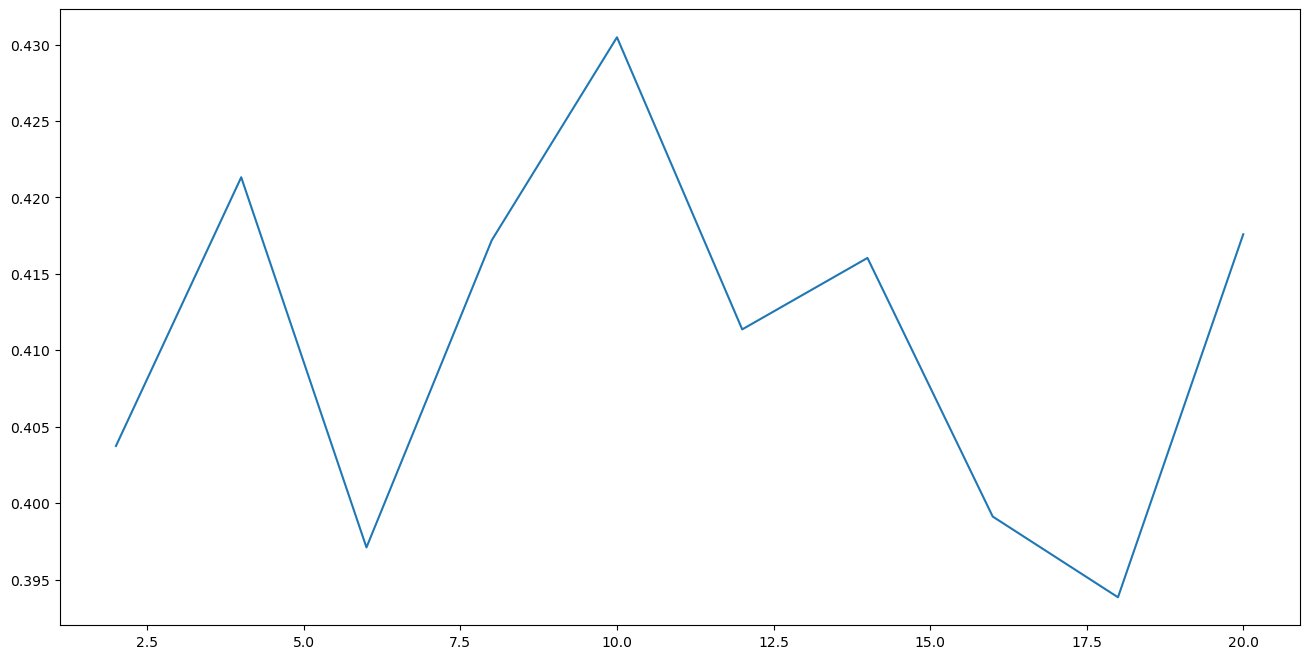

In [60]:
#plot data 
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(lda_tuning_news['Topics'], lda_tuning_news['Coherence'])

In [56]:
%%time

tuned_lda_model_news = LdaMulticore(corpus=doc_term_matrix,
                       id2word=dictionary,
                       num_topics=10,
                       random_state=100,
                       passes=10,
                       alpha='asymmetric',
                       eta='auto',
                       workers = workers)

CPU times: user 2min 43s, sys: 43.7 s, total: 3min 26s
Wall time: 3min 46s


In [58]:
%%time

lda_display_news = gensimvis.prepare(tuned_lda_model_news, doc_term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display_news)


CPU times: user 1min 23s, sys: 31.7 s, total: 1min 55s
Wall time: 1min 16s


In [59]:
pyLDAvis.save_html(lda_display_news, 'lda_visualization.html')

In [ ]:
#re.split('[,.?!:;]',df_news_final_project['text_no_special'][54376].split(df_news_final_project['clean_title'][143562])[3])

In [ ]:
#remove phone number and url
#filtered_df['text_no_phone_number'] = filtered_df['text_no_newline_or_tab'].apply(lambda x:re.sub(r'\+[\d\s()-]+','',str(x)))
#filtered_df['text_no_url'] = filtered_df['text_no_phone_number'].apply(lambda x:re.sub(r'(?:\@|http?\://|https?\://|www)\S+','',str(x)))
#remove date
#filtered_df['text_no_date'] = filtered_df['text_no_url'].apply(lambda x:re.sub(r'\w+\s+\d{1,2},\s+\d{4}','',str(x)))
#remove website 
#filtered_df['text_no_website'] = filtered_df['text_no_\xa0'].apply(lambda x:re.sub(r'\w+\.\w+\.\w+|\w+\.\w+\.com|\w+\.com|\w+\.ca','',str(x)))
#remove time  
#filtered_df['text_no_time'] = filtered_df['text_no_other'].apply(lambda x:re.sub(r'\d{2}:\d{2}\s?','',str(x)))

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import re
import string

2023-05-20 18:31:59.618927: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-20 18:31:59.618972: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [317]:
#Verify we got CPU + GPU or only CPU
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
#!pip install ktrain 

In [5]:
import ktrain
import tensorflow as tf
import torch

In [335]:
#!pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [342]:
import torch
print(torch.__version__)

2.0.1


In [324]:
#check version of tensorflow
tf.__version__

'2.12.0'

In [121]:
import ktrain

print('Ktrain Version: ' + ktrain.__version__)

Ktrain Version: 0.37.0


In [5]:
df_news = pd.read_parquet('data.parquet')

In [6]:
df_news.shape

(126230, 15)

In [9]:
texts = df_news['formal_text'].tolist()

In [10]:
len(texts)

126230

In [11]:
%%time
tm = ktrain.text.get_topic_model(
    texts=texts, 
    n_topics=10, 
    n_features=10000, 
    min_df=5, 
    max_df=0.5, 
    stop_words='english', 
    model_type='lda', 
    lda_max_iter=5, 
    verbose=1)

lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.
CPU times: user 48min 32s, sys: 42min 57s, total: 1h 31min 30s
Wall time: 14min 47s


In [12]:
tm.print_topics()

topic 0 | platform solutions cloud customers learning software machine business prnewswire solution
topic 1 | chatgpt google microsoft openai like chatbot search language users text
topic 2 | science research republic development university education global students future technologies
topic 3 | business customer companies financial investment stock million marketing insurance customers
topic 4 | digi communications market reports announces shares transactions regulated symbol notification
topic 5 | news india video content media digital app users website best
topic 6 | learning machine human used model like using models time make
topic 7 | people says rights china state year like news days years
topic 8 | health medical patients care healthcare clinical patient cancer learning drug
topic 9 | market report global analysis growth research industry key forecast players


In [13]:
%%time
tm.build(texts, threshold=0.25)

done.
CPU times: user 9min 24s, sys: 7min 3s, total: 16min 27s
Wall time: 3min 53s


In [14]:
tm.print_topics(show_counts=True)

topic:0 | count:22474 | platform solutions cloud customers learning software machine business prnewswire solution
topic:7 | count:15916 | people says rights china state year like news days years
topic:6 | count:15909 | learning machine human used model like using models time make
topic:9 | count:15696 | market report global analysis growth research industry key forecast players
topic:1 | count:13962 | chatgpt google microsoft openai like chatbot search language users text
topic:2 | count:12190 | science research republic development university education global students future technologies
topic:8 | count:9881 | health medical patients care healthcare clinical patient cancer learning drug
topic:3 | count:9747 | business customer companies financial investment stock million marketing insurance customers
topic:5 | count:8949 | news india video content media digital app users website best
topic:4 | count:487 | digi communications market reports announces shares transactions regulated symbo

In [152]:
pos_app = df_news[df_news['sentiment'] == 'positive']

In [118]:
texts_pos = pos_app['formal_text'].tolist()

In [119]:
len(texts_pos)

62209

In [122]:
%%time
tm_pos = ktrain.text.get_topic_model(
    texts=texts_pos, 
    n_topics=7, 
    n_features=10000, 
    min_df=5, 
    max_df=0.5, 
    stop_words='english', 
    model_type='lda', 
    lda_max_iter=5, 
    verbose=1)

lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.
CPU times: user 12min 42s, sys: 8min 3s, total: 20min 45s
Wall time: 7min 7s


In [123]:
tm_pos.print_topics()

topic 0 | health medical patients clinical care research patient cancer machine healthcare
topic 1 | solutions global platform digital development industry innovation support prnewswire technologies
topic 2 | platform customers customer machine cloud solutions models experience organizations services
topic 3 | chatgpt news like people google says time microsoft tech make
topic 4 | digi communications shares market stock financial reports transactions announces symbol
topic 5 | edge security smart vision systems information computer statements solutions software
topic 6 | market report global growth analysis research forecast industry key players


In [124]:
%%time
tm_pos.build(texts_pos, threshold=0.25)

done.
CPU times: user 2min 54s, sys: 1min 22s, total: 4min 16s
Wall time: 1min 58s


In [125]:
tm_pos.print_topics(show_counts=True)

topic:3 | count:18020 | chatgpt news like people google says time microsoft tech make
topic:2 | count:13934 | platform customers customer machine cloud solutions models experience organizations services
topic:1 | count:7603 | solutions global platform digital development industry innovation support prnewswire technologies
topic:5 | count:7250 | edge security smart vision systems information computer statements solutions software
topic:0 | count:6548 | health medical patients clinical care research patient cancer machine healthcare
topic:6 | count:6403 | market report global growth analysis research forecast industry key players
topic:4 | count:2367 | digi communications shares market stock financial reports transactions announces symbol


In [19]:
from ktrain import text
ts = text.TransformerSummarizer()

In [60]:
ts.summarize(tm_pos.get_docs(topic_ids=[3], rank=True)[4623]['text'])

'Microsoft Chief Technology OfficerKevin Scott In the company AI Wrote in the Q&A on the blog. He admitted that he also thought 2022 2019 is the most exciting year ever, but the pace of innovation will only get faster. In his blog post,Scott Describes how new artificial intelligence tools are democratizing design.'

In [151]:
tm_pos.get_docs(topic_ids=[2], rank=True)[37]['text']

'Commonwealth Equity Services LLC lowered its holdings in First Trust Nasdaq Artificial Intelligence and Robotics ETF (NASDAQ:ROBT) by 6.5% in the second quarter, according to its most recent 13F filing with the Securities & Exchange Commission. The firm owned 28,930 shares of the company’s stock after selling 2,009 shares during the period. Commonwealth Equity Services LLC owned approximately 0.62% of First Trust Nasdaq Artificial Intelligence and Robotics ETF worth $1,570,000 at the end of the most recent quarter.  Other hedge funds and other institutional investors have also bought and sold shares of the company. Advisor Group Holdings Inc. lifted its holdings in shares of First Trust Nasdaq Artificial Intelligence and Robotics ETF by 38.7% during the 2nd quarter. Advisor Group Holdings Inc. now owns 171,413 shares of the company’s stock worth $9,308,000 after acquiring an additional 47,834 shares during the period. Sargent Investment Group LLC lifted its holdings in shares of First

In [153]:
pos_app[pos_app['title'].str.contains('media')]

,url,date,language,title,text,text_no_tr,text_no_url,text_no_special,clean_title,clean_text,text_list,main_text,inter_text,formal_text,sentiment,year-month,sentiment_num
1167,https://ktvz.com/money/cnn-business-consumer/2023/01/26/buzzfeeds-ceo-says-ai-could-usher-in-a-new-model-for-digital-media-but-warns-against-a-dystopian-path/,2023-01-27,en,"BuzzFeed's CEO says AI could usher in a 'new model for digital media,' but warns against a 'dystopian' path - KTVZ","\n\nBuzzFeed's CEO says AI could usher in a 'new model for digital media,' but warns against a 'dystopian' path - KTVZ\ncircle-arrow\nPlay Button\nStop Button\nchevron-right\nchevron-left\nchevron-up\nsearch\nwarning\nchevron-left-skinny\nchevron-right-skinny\nx\nclock\ncalendar\nplay-button\ncancel-circle\n\nuser\ntwitter\nfacebook\nyoutube\ninstagram\nemail\nlinkedin\n\nHome\nNews\n\nCentral Oregon\nOregon-Northwest\nUS/World\nCOVID-19\nFire Alert\nCrime Stoppers\nKTVZ.COM Polls\nSpecial R...","\n\nBuzzFeed's CEO says AI could usher in a 'new model for digital media,' but warns against a 'dystopian' path - KTVZ\ncircle-arrow\nPlay Button\nStop Button\nchevron-right\nchevron-left\nchevron-up\nsearch\nwarning\nchevron-left-skinny\nchevron-right-skinny\nx\nclock\ncalendar\nplay-button\ncancel-circle\n\nuser\ntwitter\nfacebook\nyoutube\ninstagram\nemail\nlinkedin\n\nHome\nNews\n\nCentral Oregon\nOregon-Northwest\nUS/World\nCOVID-19\nFire Alert\nCrime Stoppers\nKTVZ.COM Polls\nSpecial R...","\n\nBuzzFeed's CEO says AI could usher in a 'new model for digital media,' but warns against a 'dystopian' path - KTVZ\ncircle-arrow\nPlay Button\nStop Button\nchevron-right\nchevron-left\nchevron-up\nsearch\nwarning\nchevron-left-skinny\nchevron-right-skinny\nx\nclock\ncalendar\nplay-button\ncancel-circle\n\nuser\ntwitter\nfacebook\nyoutube\ninstagram\nemail\nlinkedin\n\nHome\nNews\n\nCentral Oregon\nOregon-Northwest\nUS/World\nCOVID-19\nFire Alert\nCrime Stoppers\nKTVZ.COM Polls\nSpecial R...","\n\nBuzzFeeds CEO says AI could usher in a new model for digital media, but warns against a dystopian path - KTVZ\ncircle-arrow\nPlay Button\nStop Button\nchevron-right\nchevron-left\nchevron-up\nsearch\nwarning\nchevron-left-skinny\nchevron-right-skinny\nx\nclock\ncalendar\nplay-button\ncancel-circle\n\nuser\ntwitter\nfacebook\nyoutube\ninstagram\nemail\nlinkedin\n\nHome\nNews\n\nCentral Oregon\nOregon-Northwest\nUS/World\nCOVID-19\nFire Alert\nCrime Stoppers\nKTVZ.COM Polls\nSpecial Report...","BuzzFeed's CEO says AI could usher in a 'new model for digital media,' but warns against a 'dystopian' path","BuzzFeeds CEO says AI could usher in a new model for digital media, but warns against a dystopian path - KTVZ\ncircle-arrow\nPlay Button\nStop Button\nchevron-right\nchevron-left\nchevron-up\nsearch\nwarning\nchevron-left-skinny\nchevron-right-skinny\nx\nclock\ncalendar\nplay-button\ncancel-circle\n\nuser\ntwitter\nfacebook\nyoutube\ninstagram\nemail\nlinkedin\n\nHome\nNews\n\nCentral Oregon\nOregon-Northwest\nUS/World\nCOVID-19\nFire Alert\nCrime Stoppers\nKTVZ.COM Polls\nSpecial Reports\n\...","[BuzzFeeds CEO says AI could usher in a new model for digital media, but warns against a dystopian path - KTVZ\ncircle-arrow\nPlay Button\nStop Button\nchevron-right\nchevron-left\nchevron-up\nsearch\nwarning\nchevron-left-skinny\nchevron-right-skinny\nx\nclock\ncalendar\nplay-button\ncancel-circle\n\nuser\ntwitter\nfacebook\nyoutube\ninstagram\nemail\nlinkedin\n\nHome\nNews\n\nCentral Oregon\nOregon-Northwest\nUS/World\nCOVID-19\nFire Alert\nCrime Stoppers\nKTVZ.COM Polls\nSpecial Reports\n...","BuzzFeeds CEO says AI could usher in a new model for digital media, but warns against a dystopian path - KTVZ\ncircle-arrow\nPlay Button\nStop Button\nchevron-right\nchevron-left\nchevron-up\nsearch\nwarning\nchevron-left-skinny\nchevron-right-skinny\nx\nclock\ncalendar\nplay-button\ncancel-circle\n\nuser\ntwitter\nfacebook\nyoutube\ninstagram\nemail\nlinkedin\n\nHome\nNews\n\nCentral Oregon\nOregon-Northwest

In [155]:
df_news['formal_text'][195385]

'                                                                                                    Mahesh Narayan  If effectively used, GAI or its tools such as ChatGPT can help address the content problem of the media industry with respect to cost, quality and speed. It can also help in improving user engagement by curating customised content  The challenge here for the media industry including social media platforms is how to moderate or block such objectionable user-generated content at speed and without incurring much costs. (Source: Reuters) Amidst the noise and hyperbole around the charismatic power of Generative Artificial Intelligence (GAI), specifically ChatGPT, there is a strong divide. Many stand by the originality and sanctity of their content sans GAI. Others embrace its efficiencies. They are also questions about whether GAI is a substitute for creative abilities or an enabler to supplement its effort in creating better content. We believe it’s beneficial for the media 

In [160]:
pos_app[pos_app['title'].str.contains('NVIDIA')]

,url,date,language,title,text,text_no_tr,text_no_url,text_no_special,clean_title,clean_text,text_list,main_text,inter_text,formal_text,sentiment,year-month,sentiment_num
206,https://sciencein.me/2020/04/13/future-of-artificial-intelligence-in-healthcare-market-revenues-hit-to-usd-36-billion-by-2020-2026-with-leading-companies-like-ibm-corporation-intel-corporation-google-inc-nvidia-corporation/,2020-04-13,en,"Future of Artificial Intelligence In Healthcare Market: Revenues Hit to USD +36 Billion by 2020-2026 with leading companies like IBM Corporation, Intel Corporation, Google Inc., NVIDIA Corporation – Science In Me","\n\nFuture of Artificial Intelligence In Healthcare Market: Revenues Hit to USD +36 Billion by 2020-2026 with leading companies like IBM Corporation, Intel Corporation, Google Inc., NVIDIA Corporation – Science In Me\nPress ""Enter"" to skip to content\n\nSearch\n\n\nSearch Science In Me\n \n\nOur Writers\nAbout Us\nContact Us\nTerms and Conditions\nPrivacy Policy\nScience In MeApril 13, 2020Science, Space, Satellite and Energy Markets \n\nopen menu\n \n\n Back\n\nApplied Sciences\nAstronomy\n...","\n\nFuture of Artificial Intelligence In Healthcare Market: Revenues Hit to USD +36 Billion by 2020-2026 with leading companies like IBM Corporation, Intel Corporation, Google Inc., NVIDIA Corporation – Science In Me\nPress ""Enter"" to skip to content\n\nSearch\n\n\nSearch Science In Me\n \n\nOur Writers\nAbout Us\nContact Us\nTerms and Conditions\nPrivacy Policy\nScience In MeApril 13, 2020Science, Space, Satellite and Energy Markets \n\nopen menu\n \n\n Back\n\nApplied Sciences\nAstronomy\n...","\n\nFuture of Artificial Intelligence In Healthcare Market: Revenues Hit to USD +36 Billion by 2020-2026 with leading companies like IBM Corporation, Intel Corporation, Google Inc., NVIDIA Corporation – Science In Me\nPress ""Enter"" to skip to content\n\nSearch\n\n\nSearch Science In Me\n \n\nOur Writers\nAbout Us\nContact Us\nTerms and Conditions\nPrivacy Policy\nScience In MeApril 13, 2020Science, Space, Satellite and Energy Markets \n\nopen menu\n \n\n Back\n\nApplied Sciences\nAstronomy\n...","\n\nFuture of Artificial Intelligence In Healthcare Market: Revenues Hit to USD +36 Billion by 2020-2026 with leading companies like IBM Corporation, Intel Corporation, Google Inc., NVIDIA Corporation – Science In Me\nPress ""Enter"" to skip to content\n\nSearch\n\n\nSearch Science In Me\n \n\nOur Writers\nAbout Us\nContact Us\nTerms and Conditions\nPrivacy Policy\nScience In MeApril 13, 2020Science, Space, Satellite and Energy Markets \n\nopen menu\n \n\n Back\n\nApplied Sciences\nAstronomy\n...",Future of Artificial Intelligence In Healthcare Market: Revenues Hit to USD +36 Billion by 2020,"Future of Artificial Intelligence In Healthcare Market: Revenues Hit to USD +36 Billion by 2020-2026 with leading companies like IBM Corporation, Intel Corporation, Google Inc., NVIDIA Corporation – Science In Me\nPress ""Enter"" to skip to content\n\nSearch\n\n\nSearch Science In Me\n \n\nOur Writers\nAbout Us\nContact Us\nTerms and Conditions\nPrivacy Policy\nScience In MeApril 13, 2020Science, Space, Satellite and Energy Markets \n\nopen menu\n \n\n Back\n\nApplied Sciences\nAstronomy\nEart...","[, -2026 with leading companies like IBM Corporation, Intel Corporation, Google Inc., NVIDIA Corporation – Science In Me\nPress ""Enter"" to skip to content\n\nSearch\n\n\nSearch Science In Me\n \n\nOur Writers\nAbout Us\nContact Us\nTerms and Conditions\nPrivacy Policy\nScience In MeApril 13, 2020Science, Space, Satellite and Energy Markets \n\nopen menu\n \n\n Back\n\nApplied Sciences\nAstronomy\nEarth and Environment\nEnergy\nHealth\nNASA\nSpace\nTechnology\nSatellite\nAll News\n\n, -2026 w...","-2026 with leading companies like IBM Corporation, Intel Corporation, Google Inc., NVIDIA Corporation\nBy [emailprotected] on April 13, 2020 \n\nArtificial Intelligence is a collection of multiple technologies that imitator human being perceptive funct

In [79]:
neg_app = df_news[df_news['sentiment'] == 'negative']

In [80]:
texts_neg = neg_app['formal_text'].tolist()

In [81]:
len(texts_neg)

5616

In [82]:
%%time
tm_neg = ktrain.text.get_topic_model(
    texts=texts_neg, 
    n_topics=5, 
    n_features=10000, 
    min_df=5, 
    max_df=0.5, 
    stop_words='english', 
    model_type='lda', 
    lda_max_iter=5, 
    verbose=1)

lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.
CPU times: user 1min 4s, sys: 48.9 s, total: 1min 53s
Wall time: 29.5 s


In [83]:
tm_neg.print_topics()

topic 0 | market shares stock global growth quarter industry nasdaq price year
topic 1 | data people business companies work time tools used systems like
topic 2 | google chatgpt search chatbot microsoft openai bard users like twitter
topic 3 | says like ernie images people bot google things research work
topic 4 | traded learning machine dollar btc trades network matrix decentralized exchanges


In [84]:
%%time
tm_neg.build(texts_neg, threshold=0.25)

done.
CPU times: user 14.1 s, sys: 7.89 s, total: 22 s
Wall time: 8.45 s


In [85]:
tm_neg.print_topics(show_counts=True)

topic:1 | count:2588 | data people business companies work time tools used systems like
topic:2 | count:1053 | google chatgpt search chatbot microsoft openai bard users like twitter
topic:4 | count:675 | traded learning machine dollar btc trades network matrix decentralized exchanges
topic:0 | count:663 | market shares stock global growth quarter industry nasdaq price year
topic:3 | count:637 | says like ernie images people bot google things research work


In [127]:
neg_app[neg_app['formal_text'].str.contains('construction')]['title'].head(50)

73                                                                                                    EU falling behind in global AI race, MEPs warn
2122                                                       The Essential Architectures For Every Data Scientist and Big Data Engineer  | Hacker Noon
4817                                                                 UN urges moratorium on use of AI that imperils human rights | The Seattle Times
5317                                                   How to get your data scientists and data engineers rowing in the same direction | VentureBeat
5389                                                               Stability AI Launches ChatGPT Rival, With Some Kinks to Work Out -  BNN Bloomberg
5421                                                                           Gymnast Dunne’s AI spot raises questions about NIL ethics – CBS17.com
8440                                                                              Big tech earnings to off

In [128]:
df_news['formal_text'].loc[83172]

' to Generate $8.6 Billion by 2031: Allied Market Research Surge in demand for data integration and visual analytics drive the global artificial intelligence in construction market. In 2020, economic slowdown has affected the setup of new artificial intelligence in construction projects across the world as the majority of government funding was diverted toward the healthcare sector to save the lives of people. Based on region, North America held the largest share in 2021. Portland, OR , Nov.  21, 2022  (GLOBE NEWSWIRE) -- According to the report published by Allied Market Research, the global artificial intelligence in construction market garnered $496.4 million in 2021, and is estimated to generate $8.6 billion by 2031, manifesting a CAGR of 34.1% from 2022 to 2031. The report provides an extensive analysis of changing market dynamics, major segments, value chain, competitive scenario, and regional landscape. This research offers a valuable guidance to leading players, investors, shar

In [121]:
tm_neg.get_docs(topic_ids=[1], rank=True)[766]['text']

'A BT study has indicated a lack of awareness amongst UK students about the opportunity to pursue qualifications in AI related courses, as estimates reveal the industry will be worth £49 billion in 2022. Where almost three in five (59%) of higher education students said they were unaware of AI courses at the time of choosing their course, over half (51%) said they would consider studies centred around AI in the future.This was once they had understood and received more information about what the courses entail.Harmeen Mehta, chief innovation and digital officer at BT, said: “Having graduated in AI more than two decades ago and lived through the AI winter, I am so excited to see how AI is changing the world and how we live.“If you are someone who likes solving problems at scale, building platforms, passionate about data and AI and crave diversity of thought, a rich and diverse set of career opportunities are waiting for you."The findings were revealed in BT’s AI skills: Motivation & AI 

In [65]:
df_news.shape

(126230, 15)

In [66]:
df_news.columns

Index(['url', 'date', 'language', 'title', 'text', 'text_no_tr', 'text_no_url',
       'text_no_special', 'clean_title', 'clean_text', 'text_list',
       'main_text', 'inter_text', 'formal_text', 'sentiment'],
      dtype='object')

In [67]:
df_news.head(2)

,url,date,language,title,text,text_no_tr,text_no_url,text_no_special,clean_title,clean_text,text_list,main_text,inter_text,formal_text,sentiment
0,http://en.people.cn/n3/2021/0318/c90000-983012...,2021-03-18,en,Artificial intelligence improves parking effic...,\n\nArtificial intelligence improves parking e...,\n\nArtificial intelligence improves parking e...,\n\nArtificial intelligence improves parking e...,\n\nArtificial intelligence improves parking e...,Artificial intelligence improves parking effic...,Artificial intelligence improves parking effic...,"[, - Peoples Daily Online\n\nHome\nChina Poli...","\nBy LiuShiyao (Peoples Daily) 09:16, March 18...","By LiuShiyao (Peoples Daily) 09:16, March 18, ...","By LiuShiyao (Peoples Daily) 09:16, March 18, ...",positive
3,http://www.homeoffice.consumerelectronicsnet.c...,2021-03-10,en,Strategy Analytics: 71% of Smartphones Sold Gl...,\n\nStrategy Analytics: 71% of Smartphones Sol...,\n\nStrategy Analytics: 71% of Smartphones Sol...,\n\nStrategy Analytics: 71% of Smartphones Sol...,\n\nStrategy Analytics: 71% of Smartphones Sol...,Strategy Analytics: 71% of Smartphones Sold Gl...,Strategy Analytics: 71% of Smartphones Sold Gl...,"[, – Consumer Electronics Net\n \nSkip to con...",\n 7 hours ago \...,Artificial Intelligence Now Powers the Majorit...,Artificial Intelligence Now Powers the Majorit...,positive


In [2]:
df_news = pd.read_parquet('data.parquet')

In [3]:
df_news.shape

(126230, 15)

In [4]:
df_news['sentiment'].value_counts()

positive    62209
neutral     58405
negative     5616
Name: sentiment, dtype: int64

In [5]:
df_news.columns

Index(['url', 'date', 'language', 'title', 'text', 'text_no_tr', 'text_no_url',
       'text_no_special', 'clean_title', 'clean_text', 'text_list',
       'main_text', 'inter_text', 'formal_text', 'sentiment'],
      dtype='object')

In [5]:
df_news['year-month'] = df_news['date'].apply(lambda x: x.strftime("%Y-%m"))

In [6]:
df_news['sentiment_num'] = df_news['sentiment'].map({'positive':1,'neutral':0,'negative':-1})

In [7]:
df_sentiment_time = df_news[['sentiment_num','year-month']]

In [8]:
df_sentiment_time

,sentiment_num,year-month
0,1,2021-03
3,1,2021-03
7,1,2021-02
9,1,2020-06
10,1,2020-07
...,...,...
200324,1,2023-03
200325,0,2023-04
200327,0,2020-12
200329,0,2020-12


In [9]:
df_s_d = df_news[['sentiment_num','date']]

In [26]:
df_sd  = pd.DataFrame(df_s_d.groupby('date')['sentiment_num'].mean()).reset_index()
df_sd.columns = ['time','average_sentiment_day']

In [27]:
df_sd

,time,average_sentiment_day
0,2020-01-01,0.358974
1,2020-01-02,0.678571
2,2020-01-03,0.448276
3,2020-01-04,0.435897
4,2020-01-05,-0.244444
...,...,...
1208,2023-04-24,0.401180
1209,2023-04-25,0.524561
1210,2023-04-26,0.590810
1211,2023-04-27,0.499014


In [28]:
df_sd['time'] = pd.to_datetime(df_sd['time'])

In [46]:
df_sd[df_sd['time'].between('2022-11-01', '2022-11-30')]

,time,average_sentiment_day
1034,2022-11-01,0.758621
1035,2022-11-02,0.581081
1036,2022-11-03,0.697917
1037,2022-11-04,0.682353
1038,2022-11-05,0.428571
1039,2022-11-06,0.263158
1040,2022-11-07,0.825000
1041,2022-11-08,0.733333
1042,2022-11-09,0.893401
1043,2022-11-10,0.618421


In [75]:
df_news[(df_news['year-month'] == '2023-02') & (df_news['sentiment']=='positive')]['clean_title'].value_counts().head(5)

Microsoft bakes ChatGPT                                                                                                                  144
Most of us are still worried about AI — but will corporate America listen                                                                 56
Sony AI in Partnership with Polyphony Digital Announces First Global Release of Gran Turismo Sophy™ for Gran Turismo™ 7                   52
FLOCK INVESTS IN DATA SCIENCE AND INFORMATION TECHNOLOGY                                                                                  47
Consumer Fusion Launches Smart Review Response Feature: Using Artificial Intelligence to Evolve Online Reputation Management Software     44
Name: clean_title, dtype: int64

In [20]:
df_st  = pd.DataFrame(df_sentiment_time.groupby('year-month')['sentiment_num'].mean()).reset_index()
df_st.columns = ['time','average_sentiment']

str

In [77]:
df_st['time'] = pd.to_datetime(df_st['time'])

In [18]:
df_st

,time,average_sentiment
0,2020-01-01,0.364611
1,2020-02-01,0.344509
2,2020-03-01,0.355057
3,2020-04-01,0.396746
4,2020-05-01,0.384545
5,2020-06-01,0.438438
6,2020-07-01,0.372487
7,2020-08-01,0.430205
8,2020-09-01,0.436554
9,2020-10-01,0.423927


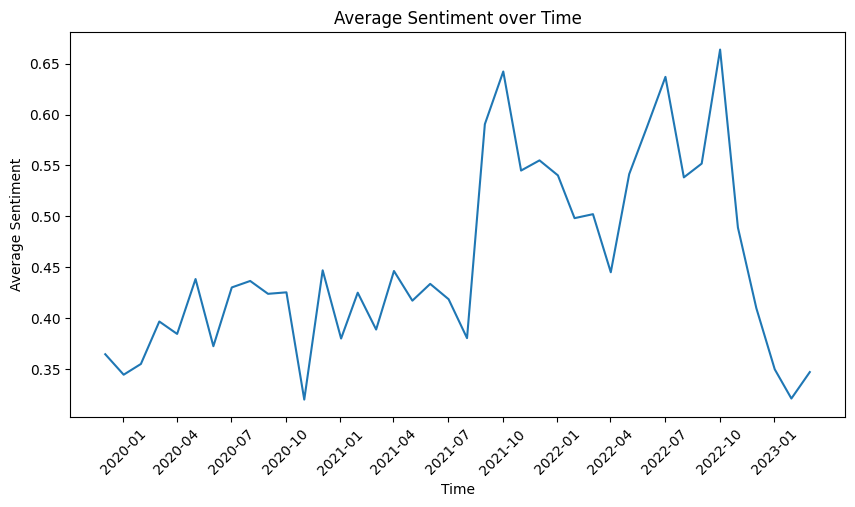

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5)) 
plt.plot(df_st['time'], df_st['average_sentiment'])
plt.xlabel('Time')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment over Time')
start_date = df_st['time'].min()
end_date = df_st['time'].max()
tick_labels = pd.date_range(start=start_date, end=end_date, freq='3M')

plt.xticks(ticks=tick_labels, labels=tick_labels.strftime('%Y-%m'))
plt.xticks(rotation=45)
plt.show()

In [85]:
zsl = ktrain.text.ZeroShotClassifier()
labels=['automotive', 'business', 'crime', 'education', 'finance', 'politics', 'sports', 'technology']

In [163]:
text_t = df_news['formal_text'][80]

In [169]:
%%time
nli_labels = zsl.predict(text_t, labels=labels, include_labels=True)
pd.DataFrame(nli_labels, columns=['Label', 'Relevance']).sort_values(by=['Relevance'], ascending=False)

CPU times: user 54.6 s, sys: 4.2 s, total: 58.8 s
Wall time: 7.38 s


,Label,Relevance
7,technology,0.972306
1,business,0.897912
4,finance,0.056707
5,politics,0.048429
2,crime,0.033393
3,education,0.026366
0,automotive,0.016248
6,sports,0.015934


In [160]:
df_news['sentiment'].head(50)

0     positive
3     positive
7     positive
9     positive
10    positive
11     neutral
13    positive
14     neutral
15     neutral
16    positive
18     neutral
19    positive
20     neutral
21    positive
22     neutral
23     neutral
25     neutral
27     neutral
28    negative
29     neutral
32     neutral
33     neutral
35     neutral
36     neutral
38     neutral
39     neutral
44     neutral
48     neutral
50     neutral
53     neutral
54     neutral
56    positive
57     neutral
58     neutral
60    negative
62     neutral
64    positive
65    positive
66     neutral
67    positive
70     neutral
71    positive
73    negative
75    positive
76    positive
78    positive
80     neutral
81    positive
82     neutral
83    positive
Name: sentiment, dtype: object

In [166]:
neutral_news = df_news[df_news['sentiment']=='neutral']

In [167]:
neutral_news.shape

(58405, 17)

In [65]:
df_sentiment = df_news[['sentiment','year-month']]

In [67]:
grouped_data

sentiment,year-month,negative,neutral,positive
0,2020-01-01,112,1198,928
1,2020-02-01,106,1137,815
2,2020-03-01,70,1384,909
3,2020-04-01,36,1263,914
4,2020-05-01,77,1200,923
5,2020-06-01,52,644,636
6,2020-07-01,98,803,691
7,2020-08-01,51,845,766
8,2020-09-01,48,983,884
9,2020-10-01,46,1290,1063


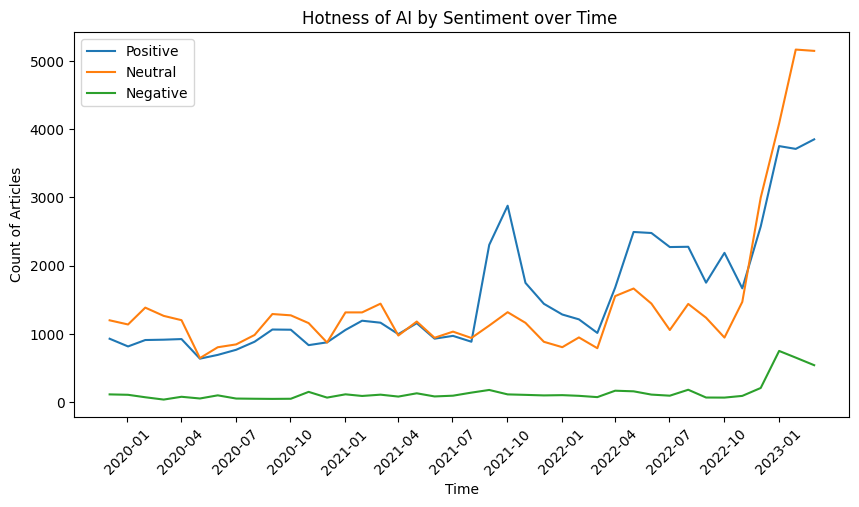

In [70]:
grouped_data = df_sentiment.groupby(['year-month', 'sentiment']).size().unstack(fill_value=0).reset_index()
grouped_data['year-month'] = pd.to_datetime(grouped_data['year-month'])
# Create the plot
plt.figure(figsize=(10, 5))  # Adjust the figure size as desired
plt.plot(grouped_data['year-month'], grouped_data['positive'], label='Positive')
plt.plot(grouped_data['year-month'], grouped_data['neutral'], label='Neutral')
plt.plot(grouped_data['year-month'], grouped_data['negative'], label='Negative')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Count of Articles')
plt.title('Hotness of AI by Sentiment over Time ')
plt.legend()

start_date = grouped_data['year-month'].min()
end_date = grouped_data['year-month'].max()
tick_labels = pd.date_range(start=start_date, end=end_date, freq='3M')

# Rotate x-axis labels if needed
plt.xticks(ticks=tick_labels, labels=tick_labels.strftime('%Y-%m'))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [26]:
import ktrain

In [27]:
zsl = ktrain.text.ZeroShotClassifier()
labels=['business','crime','hiring','media','healthcare','journalism', 'education', 'finance', 'politics', 'sports', 'technology']

In [28]:
def add_label(text):
    nli_labels = zsl.predict(text, labels=labels, include_labels=True)
    df_labels = pd.DataFrame(nli_labels, columns=['Label', 'Relevance']).sort_values(by=['Relevance'], ascending=False)
    sorted_labels = df_labels.sort_values(by='Relevance', ascending=False)
    highest_relevance_label = sorted_labels.iloc[0]['Label']
    return highest_relevance_label

In [30]:
%%time
add_label(df_news['title'][28])

CPU times: user 11.6 s, sys: 46.9 ms, total: 11.6 s
Wall time: 1.53 s


'technology'

In [15]:
df_news.columns

Index(['url', 'date', 'language', 'title', 'text', 'text_no_tr', 'text_no_url',
       'text_no_special', 'clean_title', 'clean_text', 'text_list',
       'main_text', 'inter_text', 'formal_text', 'sentiment'],
      dtype='object')

In [103]:
pos_org_dict = {'Edge Impulse':'tech','AION Labs':'Healthcare','Prisma':'tech','Coursera Inc.':'Education',
                'Nasdaq':'finance', 'LG AI Research': 'telecommunicaton','Miko':'tech', 'Sanas': 'tech','Domino Data Labs':'tech',
                'Haleon':'Healthcare','TeraRecon':'Healthcare','Upstart':'finance','Aidocs':'Healthcare',
                'Amazon': 'tech', 'Lunit':'Healthcare', 'Dell Technologies':'tech','Lenovo':'tech','HP':'tech',
                'Roche':'Healthcare', 'Google':'tech' ,'Microsoft':'tech', 'Facebook':'tech','IBM':'tech','Pfizer':'Healthcare',
                'Merck':'Healthcare','Nokia':'telecommunicaton','Hyundai':'automotive','Verizon':'telecommunicaton','Vodafone':'telecommunicaton',
                'Thomson Reuters':'law','AstraZeneca':'Healthcare','GM':'automotive',
                'NVIDIA':'tech','Apple':'tech','Intel':'tech','Tesla':'automotive','Baidu':'tech', 'FDA':'politics',
                'NYSE':'finance','Alphabet':'tech','Samsung':'telecommunicaton','Oracle':'tech','Tiktok':'tech',
                'Salesforce':'tech', 'NASA':'politics','Netflix':'media','Spotify':'media','Ethereum':'finance',
                'Twitter':'media','Youtube':'media','Deloitte':'finance','Sony':'electronics', 'AMD':'electronics',
                'Huawei':'tech','Pentagon':'politics','Qualcomm':'telecommunication','BureauInvestigate':'politics',
                'Reddit':'media','Darktrace':'tech','Adobe':'tech','HPE':'tech','NHS':'politics',
               'Walmart':'retail','Morgan Stanley':'finance','Midjourney':'tech','Clearview':'tech',
               'EdgeCortix':'tech','Digital Diagnostics':'Healthcare','Uber':'transportation','Bosch':'tech',
                'NFL':'sport','SenseTime':'tech','HSS':'Healthcare','Renalytix':'Healthcare','Insilico Medicine':'Healthcare',
                'Ford':'automotive','Tencent':'tech','GE Healthcare':'Healthcare','SAS Institute Inc.':'tech',
                'Wipro':'tech','BuzzFeed':'media','Boeing':'airline','DDN':'tech','Medtronic':'Healthcare','the Department of Defense':'politics',
               'SEC':'finance','ET Telecom':'telecommunication','The Motley Fool':'finance','KLAS':'Healthcare','UofL Health':'Healthcare',
               'HackerOne':'tech','Tipranks':'finance','Chevron':'energy','Aragon Research':'tech','J.P. Morgan':'finance','CEVA':'retail',
               'Haleon':'Healthcare','PNY':'finance','ElectrifAi':'tech','SambaNova':'tech','BP':'energy'}

In [104]:
len(pos_org_dict)

100

In [105]:
import numpy as np

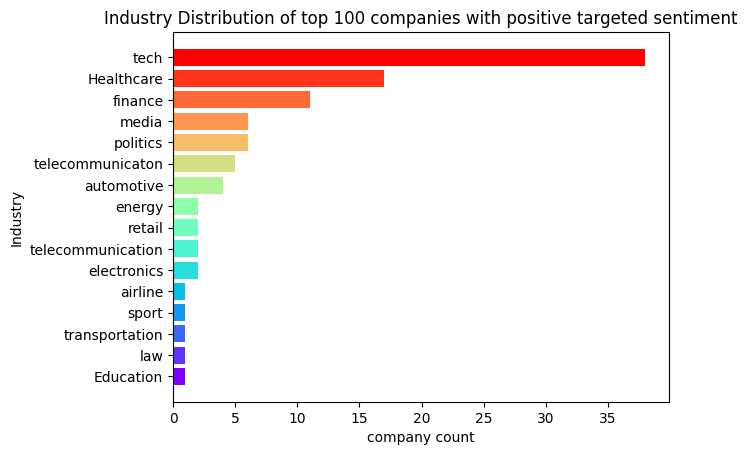

In [110]:
from collections import Counter
industry_list = list(pos_org_dict.values())
item_freq = Counter(industry_list)

# Extracting the items and frequencies
items = list(item_freq.keys())
frequencies = list(item_freq.values())


sorted_indices = sorted(range(len(frequencies)), key=lambda k: frequencies[k], reverse=False)
items = [items[i] for i in sorted_indices]
frequencies = [frequencies[i] for i in sorted_indices]

# Define rainbow colors
colors = plt.cm.rainbow(np.linspace(0, 1, len(items)))

# Plotting the bar chart with rainbow colors
plt.barh(items, frequencies, color=colors)
#Plotting the bar chart
plt.xlabel('company count')
plt.ylabel('Industry')
plt.title('Industry Distribution of top 100 companies with positive targeted sentiment')
plt.show()

In [111]:
pos_key = list(pos_org_dict.keys())

In [113]:
org_counts = org_all['Entities'].value_counts().reset_index()

org_counts.columns = ['Entity', 'frequency']

# Sort by frequency in descending order
org_counts = org_counts.sort_values('frequency', ascending=False)

pos_key_org = org_counts[org_counts['Entity'].isin(pos_key)]

In [114]:
entities = pos_key_org['Entity'].tolist()
frequencies = pos_key_org['frequency'].tolist()

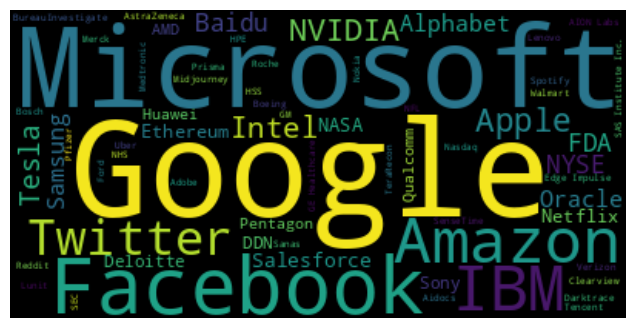

In [116]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_freq = dict(zip(entities, frequencies))

# Generating the word cloud with word sizes based on frequency
wordcloud = WordCloud(relative_scaling=0.5)
wordcloud.generate_from_frequencies(word_freq)

# Plotting the word cloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [88]:
ner_result = pd.read_csv('ner_result.csv')

In [89]:
ner_result.drop('Unnamed: 0',axis=1,inplace=True)

In [90]:
org_all = ner_result[ner_result['Labels'] == 'ORG']

In [96]:
org_counts = org_all['Entities'].value_counts().reset_index()

org_counts.columns = ['Entity', 'frequency']

# Sort by frequency in descending order
org_counts = org_counts.sort_values('frequency', ascending=False)

In [97]:
large_org = org_counts[org_counts['frequency'] >=300]
large_org_name = large_org['Entity'].to_list()

In [98]:
# Calculate the average sentiment for each entity
org_l = org_all[org_all['Entities'].isin(large_org_name)]
avg_sentiment_org = org_l.groupby('Entities')['Sentiment'].mean()

# Sort entities by average sentiment in descending order
sorted_org = pd.DataFrame(avg_sentiment_org.sort_values(ascending=False))

# Print the sorted entities with their average sentiment
sorted_org.to_csv('sorted_org_large.csv')

In [ ]:
df_news[df_news['sentiment']=='posit']